In [156]:
library(twitteR)
library(RSQLite)
library(ggmap)
library(ggplot2)
library(plyr)
library(RSQLite)
library(data.table)
setup_twitter_oauth("klxgbhkXthwJnyaZkEGhCjkzc","QlDgLS9lZGDu4pmzeedbVsM7yq4SGJMuTg43kqKCwmkcgfmj91","772501946771070976-Jn3eTgPox3BT5AO2JSPhijJT9JRYPaH","17g643pjFbGeH0JIY1Gl9FalHL3K4KtnRbqLljAYc1GDd")

[1] "Using direct authentication"


In [157]:
sqlite    <- dbDriver("SQLite")#Establishing connection with the database
con <- dbConnect(sqlite,"Lab-1.sqlite")#creating database file to store the tables and data frames

In [158]:
tweets_file_db = tempfile() #database file to store the fetched tweets
register_sqlite_backend(tweets_file_db)
tag="#touchdown"
tweets<-searchTwitter(tag,500)

store_tweets_db(tweets)#storing the tweets in database

[1] TRUE

In [159]:
from_db<-load_tweets_db()#retrieving tweets from the database
show(from_db)#displaying the retrieved tweets

[[1]]
[1] "Aeryn104: RT @SportsDen451: RT &amp; FOLLOW for a Chance to WIN this #Autographed #JamesWhite #Patriots #SB51 WINNING #Touchdown 16 x 20 Photo W/ \" GW SB…"

[[2]]
[1] "aodk__xoxo__oO: RT @Yume_Carat: #TWICE / #Touchdown ⏳\xed\xa0\xbc\xed\xbc\x88\xed\xa0\xbd\xed\xb2\x9f\n\nこの曲もリクエスト多かった〜〜\xed\xa0\xbd\xed\xb8\x82✨ありがとう\xed\xa0\xbd\xed\xb2\x97\n\n少しでもいいと思ったら #らぶりつ お願いします！！！\xed\xa0\xbd\xed\xb8\x84⭐️\n\n#트와이스 \n#dance\n#kpop\n\n他の #踊ってみた は #Yumeは出来…"

[[3]]
[1] "MassholeThe: RT @Limited66702616: RT &amp; FOLLOW US for a Chance to WIN this #Autographed #JamesWhite #Patriots #SB51 WINNING #Touchdown 16x20 Photo W/ \" G…"

[[4]]
[1] "ThaRealTB: @Dame_Lillard #Touchdown"

[[5]]
[1] "_Dizzy4real: Listen to Touchdown ft. CST Truey &amp; Chae Rillo by CST_Dizzy #np on #SoundCloud #Touchdown #nfl... https://t.co/L51Ywa7x2c"

[[6]]
[1] "_Dizzy4real: Listen to Touchdown ft. CST Truey &amp; Chae Rillo by CST_Dizzy #np on #SoundCloud #Touchdown #nfl  https://t.co/ZfgTQylKvj"

[[7]]
[1] "co

In [160]:
df1<-twListToDF(tweets)#converting the list of tweets to data-frames
show(df1)

                                                                                                                                                                                                                                                                                                                                   text
1                                                                                                                                                                                      RT @SportsDen451: RT &amp; FOLLOW for a Chance to WIN this #Autographed #JamesWhite #Patriots #SB51 WINNING #Touchdown 16 x 20 Photo W/ " GW SB…
2   RT @Yume_Carat: #TWICE / #Touchdown ⏳\xed\xa0\xbc\xed\xbc\x88\xed\xa0\xbd\xed\xb2\x9f\n\nこの曲もリクエスト多かった〜〜\xed\xa0\xbd\xed\xb8\x82✨ありがとう\xed\xa0\xbd\xed\xb2\x97\n\n少しでもいいと思ったら #らぶりつ お願いします！！！\xed\xa0\xbd\xed\xb8\x84⭐️\n\n#트와이스 \n#dance\n#kpop\n\n他の #踊ってみた は #Yumeは出来…
3                                                                         

In [161]:
users<-lookupUsers(df1$screenName)#looking up for the Screen names of the users and storing them in 'users'
show(users)

$Aeryn104
[1] "Aeryn104"

$aodk__xoxo__oO
[1] "aodk__xoxo__oO"

$MassholeThe
[1] "MassholeThe"

$ThaRealTB
[1] "ThaRealTB"

$`_Dizzy4real`
[1] "_Dizzy4real"

$contentbroadb
[1] "contentbroadb"

$luetta_mabry
[1] "luetta_mabry"

$Flugkapi
[1] "Flugkapi"

$NickiH3
[1] "NickiH3"

$touchdownbot
[1] "touchdownbot"

$daveaude
[1] "daveaude"

$max_million
[1] "max_million"

$kymnasium
[1] "kymnasium"

$MCBonde1
[1] "MCBonde1"

$Hoglitosis
[1] "Hoglitosis"

$carolineenovoa
[1] "carolineenovoa"

$jardine_delacru
[1] "jardine_delacru"

$armanddye
[1] "armanddye"

$RichEPlum0
[1] "RichEPlum0"

$Mitch_John573
[1] "Mitch_John573"

$BbSkeeta64
[1] "BbSkeeta64"

$pon7_pon6
[1] "pon7_pon6"

$twittFliy
[1] "twittFliy"

$NascarFreak_3
[1] "NascarFreak_3"

$marsha_guzman
[1] "marsha_guzman"

$tabbithagamble
[1] "tabbithagamble"

$superbustybowl
[1] "superbustybowl"

$memorabliaman
[1] "memorabliaman"

$DongaLegend64
[1] "DongaLegend64"

$SportsCardDeals
[1] "SportsCardDeals"

$NCKID75
[1] "NCKID75"

$jdu

In [162]:
df_users<-twListToDF(users)#converting the list of users to data-frames
show(df_users)

                                                                                                                                                                                                                                                                                                                                                                                                                                 description
Aeryn104                                                                                                                                                                                                                                                                                                                                                                                                I'm living life the good life in VA!
aodk__xoxo__oO                                                                                                                                

In [163]:
#retrieving the locations that are not null from the data frame of users
locations<-!is.na(df_users$location)
locations_notnull<-geocode(df_users$location[locations],source="dsk")
show(locations_notnull)

Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Va&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=next%20?&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "next ?"”Warning message:
“geocode failed with status ZERO_RESULTS, location = "contentbroadband@gmail.com"”Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Third%20stone%20from%20the%20sun.&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Third stone from the sun."”Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=at%20peace.&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "at peace."”Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Colonial%20Heights%20VA%20USA&sensor=false
Information from URL : http://www.datasciencetoolkit.o

             lon       lat
1    -77.4467500  37.54812
2             NA        NA
3             NA        NA
4   -118.0213530  35.12562
5    -87.9584090  43.01126
6             NA        NA
7             NA        NA
8             NA        NA
9             NA        NA
10   -98.5000000  39.76000
11  -118.2436800  34.05223
12   -81.9167600  31.55143
13            NA        NA
14   -79.4163000  43.70011
15            NA        NA
16            NA        NA
17            NA        NA
18            NA        NA
19   -77.3969890  37.26219
20  -122.3320710  47.60621
21            NA        NA
22            NA        NA
23            NA        NA
24  -122.9456560  45.31762
25   120.9822000  14.60420
26            NA        NA
27            NA        NA
28   -80.1279090  26.12132
29            NA        NA
30   -81.3732910  28.54518
31   -80.1334420  35.97502
32   -74.6337300  39.46883
33    -5.8611200  43.36662
34     3.3958300   6.45306
35  -118.0213530  35.12562
36            NA        NA
3

In [164]:
#calculating the frequency of each longitude and latitude coordinate pair
freq_table<-count(locations_notnull,vars=c("lon","lat"))
show(freq_table)

             lon       lat freq
1   -154.8189700  19.50113    1
2   -149.8557020  61.22002    1
3   -122.9456560  45.31762    1
4   -122.6614860  45.63873    1
5   -122.3320710  47.60621    1
6   -120.5014700  47.50012    1
7   -120.5013900  44.00013    1
8   -118.2484050  33.97395    1
9   -118.2436800  34.05223    1
10  -118.0213530  35.12562    3
11  -117.6392090  33.95376    1
12  -115.2069690  36.30107    1
13  -113.6425800  60.10867    1
14  -112.4614820  33.46194    1
15  -112.0740400  33.44838    1
16  -111.5009800  34.50030    1
17  -111.3877000  33.77120    1
18  -106.4845920  31.76361    1
19  -102.8682200  46.53918    1
20  -102.4107500  34.23314    1
21  -101.8551700  33.57786    1
22  -101.2043200  34.14341    1
23  -100.0006800  47.50027    2
24   -99.2506100  31.25044    3
25   -98.5288890  29.46841    1
26   -98.5000000  39.76000    9
27   -97.4672900  20.48697    1
28   -97.3990670  27.79780    1
29   -97.2914840  32.77142    1
30   -97.1382000  31.55201    1
31   -95

In [165]:
#Writing the contents of freq_table to database table name 'geocodes'
dbWriteTable(con,"geocodes",freq_table,append=TRUE,overwrite=FALSE)

[1] TRUE

In [166]:
#reading the geocodes from the database
geocodes_table<-dbReadTable(con,"geocodes")
geocodes_table

lon,lat,freq
-155.8306,20.23731,1
-152.2321,57.57890,1
-150.0003,64.00028,1
-132.3644,56.44989,1
-125.0032,53.99983,1
-123.1193,49.24966,4
-122.7832,38.45041,1
-122.7638,47.27482,1
-122.7278,37.78483,1
-122.6908,45.50786,2


Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.763284,-95.363271&zoom=4&size=640x640&scale=2&maptype=roadmap&sensor=false
Warning message:
“Removed 1294 rows containing missing values (geom_point).”

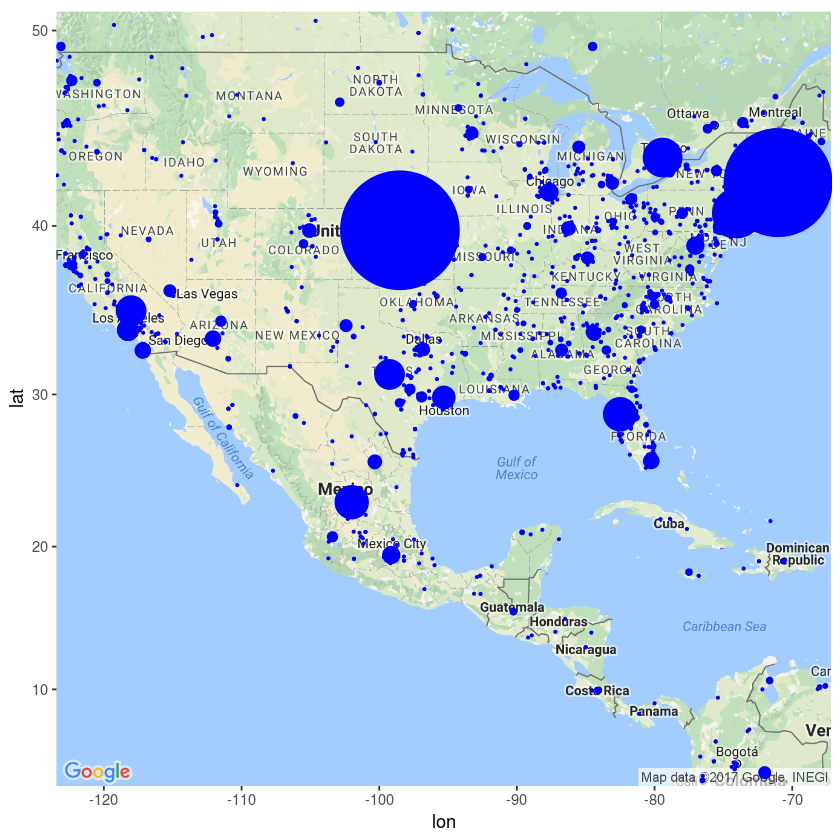

In [167]:
#run this part to plot the locations according to their tweets' frequency on the map of United States
map<-get_googlemap(location="United States",zoom=4,source="dsk",maptype="roadmap")
map.plot<-ggmap(map)
map.plot<-map.plot+geom_point(data=geocodes_table,aes(x=geocodes_table$lon,y=geocodes_table$lat),size=geocodes_table$freq/2,color="blue")
print(map.plot)

In [168]:
show(geocodes_table)

              lon       lat freq
1    -155.8305520  20.23731    1
2    -152.2321400  57.57890    1
3    -150.0002800  64.00028    1
4    -132.3644070  56.44989    1
5    -125.0032000  53.99983    1
6    -123.1193400  49.24966    4
7    -122.7831590  38.45041    1
8    -122.7637500  47.27482    1
9    -122.7278020  37.78483    1
10   -122.6907940  45.50786    2
11   -122.6614860  45.63873    1
12   -122.4194200  37.77493    1
13   -122.3320700  47.60621    3
14   -122.1585800  38.04936    1
15   -122.1269000  44.56720    1
16   -122.0400000  37.37000    1
17   -122.0177400  37.38856    1
18   -121.7053270  37.18940    2
19   -121.6738050  40.51307    1
20   -121.6555010  36.67774    1
21   -121.2907800  37.95770    1
22   -121.0448460  38.68685    1
23   -121.0167960  37.66946    1
24   -120.6265700  36.98606    1
25   -120.5014700  47.50012    2
26   -120.4636940  37.99161    1
27   -119.8130510  39.52575    1
28   -119.7462000  36.17000    1
29   -119.7349470  36.86260    1
30   -119.